## Import Libraries

In [1]:
# Library to support working with data
import pandas as pd
import numpy as np

# Data Normalization Support Library
from sklearn.preprocessing import MinMaxScaler

# Performance metrics calculation support library
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error

# Graphing support library
from matplotlib import ticker
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AZN-AstraZeneca.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,41.610001,41.759998,41.480000,41.759998,36.845528,4590000
1,2019-03-04,41.730000,41.810001,41.389999,41.689999,36.783760,3948200
2,2019-03-05,41.560001,42.610001,41.560001,42.310001,37.330803,5668200
3,2019-03-06,42.360001,42.389999,41.930000,42.029999,37.083748,2490000
4,2019-03-07,41.610001,41.770000,41.330002,41.660000,36.757298,5283900
...,...,...,...,...,...,...,...
1254,2024-02-23,64.959999,65.930000,64.949997,65.830002,65.830002,7388200
1255,2024-02-26,66.080002,66.370003,65.750000,65.930000,65.930000,4597900
1256,2024-02-27,65.940002,66.459999,65.769997,66.330002,66.330002,4433500
1257,2024-02-28,65.459999,65.779999,65.160004,65.349998,65.349998,6030600


## Reset index

In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)

In [4]:
# Select the Close column as the dependent variable
df_Close = df[['Close']]
df_Close = df_Close.reset_index(drop=True)

## Data normalization

In [5]:
# Min-max normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Close))

## Data splitting

In [6]:
# Split the data into training, validation and test dataset in a ratio of 6:2:2
train_size = int(0.6 * len(data_scaled))
val_size = int(0.2 * len(data_scaled))
test_size = len(data_scaled) - train_size - val_size

train_data = data_scaled[: train_size]
val_data = data_scaled[train_size : train_size + val_size]
test_data = data_scaled[train_size + val_size :]

## Model training and testing

In [7]:
pip install blosc2~=2.0.0

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Install library pmdarima
!pip install pmdarima

## Training process

In [9]:
# Preparing training data
x_train = np.arange(train_size).reshape(-1, 1)
y_train = train_data.reshape(-1)

In [10]:
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3570.378, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3554.783, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3567.385, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3566.412, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3556.177, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3564.020, Time=0.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3563.870, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-3559.981, Time=0.48 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-3560.061, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3565.800, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-3570.969, Time=0.78 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-3564.224, Time=0.39 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-3564.425, Time=0.90 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-3565.927, Time=0.17 sec
 ARIMA(0,1,4)(0,0,0

In [11]:
# Fit the model
model.fit(y_train)

ARIMA(order=(1, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

## Validate Processing

In [12]:
# Preparing validation data
x_val = np.array(range(train_size, train_size + val_size)).reshape(-1, 1)
y_val = np.array(val_data).reshape(-1)
y_pred_val = model.predict(n_periods = len(y_val))

## Testing Processing

In [13]:
x_test = np.array(range(test_size, train_size + val_size + test_size)).reshape(-1, 1)
y_test = np.array(test_data).reshape(-1)
y_pred = model.predict(n_periods=len(y_test))

## Evaluate Model

In [14]:
# Evaluate the accuracy of validation
y_val = scaler.inverse_transform(np.array([y_val]).reshape(-1, 1))
y_pred_val = scaler.inverse_transform(np.array([y_pred_val]).reshape(-1, 1))

val_mape = mean_absolute_percentage_error(y_val, y_pred_val)
val_mse = mean_squared_error(y_val, y_pred_val)
val_rmse = np.sqrt(val_mse)
val_msle = mean_squared_log_error(y_val, y_pred_val)

print(f"MAPE on Validate set: ", val_mape)
print(f"RMSE on Validate set: ", val_rmse)
print(f"MSLE on Validate set: ", val_msle)

MAPE on Validate set:  0.08189438971398057
RMSE on Validate set:  6.0141725078692305
MSLE on Validate set:  0.008720794926592557


In [15]:
# Evaluate the accuracy of test
y_test = scaler.inverse_transform(np.array([y_test]).reshape(-1, 1))
y_pred = scaler.inverse_transform(np.array([y_pred]).reshape(-1, 1))

test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred)

print(f"MAPE on Test dataset: ", test_mape)
print(f"RMSE on Test dataset: ", test_rmse)
print(f"MSLE on Test dataset: ", test_msle)

MAPE on Test dataset:  0.11410578725631079
RMSE on Test dataset:  8.766063742578222
MSLE on Test dataset:  0.017346653495261398


# Predicting the next 60 days

## Preparing the prediction data

In [16]:
# The process of creating index predict next 60 days
last_index =  df_Close.index[-1]

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)

## Prediction process

In [17]:
# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(n_periods=len(x_next_60_days))
y_next_60_days = scaler.inverse_transform(np.array([y_next_60_days]).reshape(-1, 1))

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days.flatten())

Predicted closing prices for the next 60 days:
[60.17507021 60.1638501  60.347094   60.19111391 60.32388662 60.2108684
 60.30707129 60.22518188 60.29488743 60.23555297 60.2860594  60.24306753
 60.27966288 60.24851234 60.27502817 60.25245748 60.27167001 60.255316
 60.26923679 60.2573872  60.26747376 60.25888792 60.26619632 60.25997529
 60.26527073 60.26076317 60.26460007 60.26133404 60.26411414 60.26174768
 60.26376205 60.26204738 60.26350693 60.26226454 60.26332208 60.26242189
 60.26318815 60.26253589 60.2630911  60.2626185  60.26302079 60.26267835
 60.26296984 60.26272172 60.26293292 60.26275315 60.26290617 60.26277591
 60.26288679 60.26279241 60.26287275 60.26280436 60.26286258 60.26281303
 60.2628552  60.2628193  60.26284986 60.26282385 60.26284599 60.26282714]


## Preparing the forecast date index

In [18]:
# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 60 days
index_next_60_days = pd.date_range(start=next_date, periods=60).tolist()

## Visualization

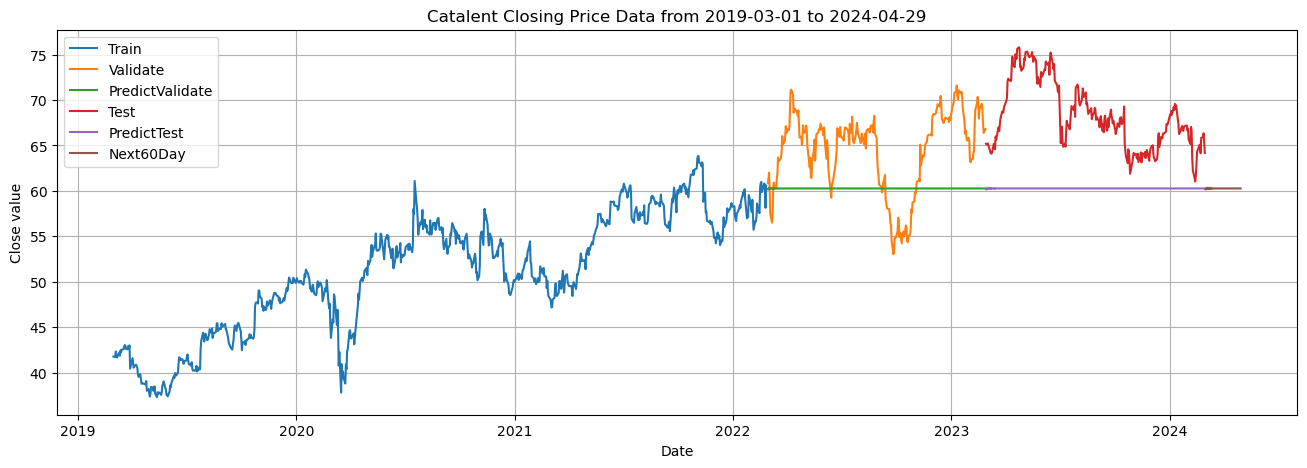

In [19]:
# Drawing
plt.figure(figsize=(16, 5))

plt.plot(df.index[:train_size], scaler.inverse_transform(np.array([y_train]).reshape(-1, 1)))

plt.plot(df.index[train_size : train_size + val_size], y_val)

plt.plot(df.index[train_size : train_size + val_size], y_pred_val)

plt.plot(df.index[train_size + val_size :], y_test)

plt.plot(df.index[train_size + val_size :], y_pred)

plt.plot(index_next_60_days, y_next_60_days)

plt.legend(['Train', 'Validate', 'PredictValidate', 'Test', 'PredictTest', 'Next60Day'])

plt.grid()
plt.title(f"Catalent Closing Price Data from {df.index[0].strftime('%Y-%m-%d')} to {index_next_60_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.ylabel("Close value")
plt.savefig('image/ARIMA_622_60day_AZN.png')
plt.show()